In [ ]:
!pip install ta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import yfinance as yf
from datetime import datetime
import os
import ta
import math
import joblib
from pathlib import Path

In [ ]:
# Setting up the subfolder to store stock price data

project_root = Path.cwd().parent
price_data_path = project_root / "data" / "price-data"
price_data_path.mkdir(exist_ok=True)

In [ ]:
# Setting up the subfolder to store sentiment data

sentiment_data_path = project_root / "data" / "sentiment-data"
sentiment_data_path.mkdir(exist_ok=True)

In [ ]:
# Setting up the subfolder to store general data

data_path = project_root / "data"
data_path.mkdir(exist_ok=True)

In [ ]:
df1 = pd.read_csv(price_data_path / "AAPL.csv")
df2 = pd.read_csv(price_data_path / "JNJ.csv")
df3 = pd.read_csv(price_data_path / "NVDA.csv")
df4 = pd.read_csv(price_data_path / "MSFT.csv")
df5 = pd.read_csv(price_data_path / "AMZN.csv")

In [ ]:
df1['Stock Type'] = 'AAPL'
df2['Stock Type'] = 'JNJ'
df3['Stock Type'] = 'NVDA'
df4['Stock Type'] = 'MSFT'
df5['Stock Type'] = 'AMZN'

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [ ]:
cols = df.columns.tolist()
cols = [cols[-1]] + cols[:-1]
df = df[cols]

In [ ]:
df

,Stock Type,Date,Close,High,Low,Open,Volume
0,AAPL,2009-04-01,3.881786,3.892857,3.710357,3.717500,589372000
1,AAPL,2009-04-02,4.025357,4.098214,3.920714,3.933571,812366800
2,AAPL,2009-04-03,4.142500,4.147500,4.054286,4.078214,636241200
3,AAPL,2009-04-06,4.230357,4.241071,4.045714,4.105000,658064400
4,AAPL,2009-04-07,4.107143,4.166786,4.078214,4.161786,536580800
...,...,...,...,...,...,...,...
20125,AMZN,2025-03-26,201.130005,206.009995,199.929993,205.839996,32855300
20126,AMZN,2025-03-27,201.360001,203.789993,199.279999,200.889999,27317700
20127,AMZN,2025-03-28,192.720001,199.259995,191.880005,198.419998,52548200
20128,AMZN,2025-03-31,190.259995,191.330002,184.399994,188.190002,63547600


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Stock Type,Date,Close,High,Low,Open,Volume,Year,Month,Day
0,AAPL,2009-04-01,3.881786,3.892857,3.710357,3.717500,589372000,2009,4,1
1,AAPL,2009-04-02,4.025357,4.098214,3.920714,3.933571,812366800,2009,4,2
2,AAPL,2009-04-03,4.142500,4.147500,4.054286,4.078214,636241200,2009,4,3
3,AAPL,2009-04-06,4.230357,4.241071,4.045714,4.105000,658064400,2009,4,6
4,AAPL,2009-04-07,4.107143,4.166786,4.078214,4.161786,536580800,2009,4,7


In [ ]:
df['DayOfYear'] = df['Date'].dt.dayofyear
df['MonthLength'] = df['Date'].dt.daysinmonth
df['DayOfWeek'] = df['Date'].dt.dayofweek

df['DayOfYear_sin'] = np.sin(2 * np.pi * df['DayOfYear'] / 365)
df['DayOfYear_cos'] = np.cos(2 * np.pi * df['DayOfYear'] / 365)

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / df['MonthLength'])
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / df['MonthLength'])

df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

df.drop(columns=['Month', 'Day', 'DayOfYear', 'DayOfWeek'], inplace=True)

df

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,DayOfYear_cos,Month_sin,Month_cos,Day_sin,Day_cos,DayOfWeek_sin,DayOfWeek_cos
0,AAPL,2009-04-01,3.881786,3.892857,3.710357,3.717500,589372000,2009,30,0.999991,0.004304,0.866025,-5.000000e-01,2.079117e-01,0.978148,0.974928,-0.222521
1,AAPL,2009-04-02,4.025357,4.098214,3.920714,3.933571,812366800,2009,30,0.999917,-0.012910,0.866025,-5.000000e-01,4.067366e-01,0.913545,0.433884,-0.900969
2,AAPL,2009-04-03,4.142500,4.147500,4.054286,4.078214,636241200,2009,30,0.999546,-0.030120,0.866025,-5.000000e-01,5.877853e-01,0.809017,-0.433884,-0.900969
3,AAPL,2009-04-06,4.230357,4.241071,4.045714,4.105000,658064400,2009,30,0.996659,-0.081676,0.866025,-5.000000e-01,9.510565e-01,0.309017,0.000000,1.000000
4,AAPL,2009-04-07,4.107143,4.166786,4.078214,4.161786,536580800,2009,30,0.995105,-0.098820,0.866025,-5.000000e-01,9.945219e-01,0.104528,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125,AMZN,2025-03-26,201.130005,206.009995,199.929993,205.839996,32855300,2025,31,0.994218,0.107381,1.000000,6.123234e-17,-8.486443e-01,0.528964,0.974928,-0.222521
20126,AMZN,2025-03-27,201.360001,203.789993,199.279999,200.889999,27317700,2025,31,0.995919,0.090252,1.000000,6.123234e-17,-7.247928e-01,0.688967,0.433884,-0.900969
20127,AMZN,2025-03-28,192.720001,199.259995,191.880005,198.419998,52548200,2025,31,0.997325,0.073095,1.000000,6.123234e-17,-5.712682e-01,0.820763,-0.433884,-0.900969
20128,AMZN,2025-03-31,190.259995,191.330002,184.399994,188.190002,63547600,2025,31,0.999769,0.021516,1.000000,6.123234e-17,-2.449294e-16,1.000000,0.000000,1.000000


In [ ]:
df = df.sort_values(['Stock Type', 'Date'])

In [ ]:
cyclical_cols = [
    'DayOfYear_sin', 'DayOfYear_cos',
    'Day_sin', 'Day_cos',
    'DayOfWeek_sin', 'DayOfWeek_cos',
    'Month_sin', 'Month_cos', 'MonthLength'
]

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in cyclical_cols]

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

for col in numerical_cols:
    df = cap_outliers_iqr(df, col)

df.tail()

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,DayOfYear_cos,Month_sin,Month_cos,Day_sin,Day_cos,DayOfWeek_sin,DayOfWeek_cos
12073,NVDA,2025-03-26,113.760002,118.839996,112.709999,118.730003,293463300,2025,31,0.994218,0.107381,1.000000,6.123234e-17,-8.486443e-01,0.528964,0.974928,-0.222521
12074,NVDA,2025-03-27,111.430000,114.449997,110.660004,111.349998,236902100,2025,31,0.995919,0.090252,1.000000,6.123234e-17,-7.247928e-01,0.688967,0.433884,-0.900969
12075,NVDA,2025-03-28,109.669998,112.870003,109.070000,111.489998,229872500,2025,31,0.997325,0.073095,1.000000,6.123234e-17,-5.712682e-01,0.820763,-0.433884,-0.900969
12076,NVDA,2025-03-31,108.379997,110.959999,103.650002,105.129997,299212700,2025,31,0.999769,0.021516,1.000000,6.123234e-17,-2.449294e-16,1.000000,0.000000,1.000000
12077,NVDA,2025-04-01,110.150002,110.199997,106.470001,108.519997,222614000,2025,30,0.999991,0.004304,0.866025,-5.000000e-01,2.079117e-01,0.978148,0.781831,0.623490


In [ ]:
le = LabelEncoder()
df['Stock Type'] = le.fit_transform(df['Stock Type'])

In [ ]:
joblib.dump(le, 'stock_type_encoder.pkl')

['stock_type_encoder.pkl']

In [ ]:
def compute_technical_indicators(group):
    # Sort by date within the stock group
    group = group.sort_values('Date').copy()

    # Simple Moving Averages
    group['SMA_5'] = ta.trend.sma_indicator(close=group['Close'], window=5)
    group['SMA_10'] = ta.trend.sma_indicator(close=group['Close'], window=10)
    group['SMA_20'] = ta.trend.sma_indicator(close=group['Close'], window=20)
    group['SMA_30'] = ta.trend.sma_indicator(close=group['Close'], window=30)

    # RSI - Relative Strength Index
    group['RSI_14'] = ta.momentum.rsi(close=group['Close'], window=14)

    # Bollinger Bands
    bb = ta.volatility.BollingerBands(close=group['Close'], window=20, window_dev=2)
    group['BB_High'] = bb.bollinger_hband()
    group['BB_Low'] = bb.bollinger_lband()
    group['BB_Middle'] = bb.bollinger_mavg()
    group['BB_Width'] = bb.bollinger_wband()

    # MACD - Moving Average Convergence Divergence
    macd = ta.trend.MACD(close=group['Close'])
    group['MACD'] = macd.macd()
    group['MACD_Signal'] = macd.macd_signal()
    group['MACD_Diff'] = macd.macd_diff()

    # Price-based features
    group['Price Range'] = group['High'] - group['Low']
    group['Volatility_5'] = group['Close'].rolling(window=5).std()
    group['Volatility_10'] = group['Close'].rolling(window=10).std()
    group['Return_5'] = group['Close'].pct_change(periods=5)
    group['Price Change'] = group['Close'] - group['Open']
    group['Prev Close'] = group['Close'].shift(1)

    return group


In [ ]:
df = df.sort_values(['Stock Type', 'Date'])
df = pd.concat(
    [compute_technical_indicators(g) for _, g in df.groupby('Stock Type')],
    axis=0
).reset_index(drop=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,...,BB_Width,MACD,MACD_Signal,MACD_Diff,Price Range,Volatility_5,Volatility_10,Return_5,Price Change,Prev Close
33,0,2009-05-19,4.551786,4.618214,4.490714,4.529286,372422400,2009,31,0.680773,...,11.359078,0.063851,0.095607,-0.031756,0.127500,0.116616,0.142204,0.024353,0.022500,4.523214
34,0,2009-05-20,4.495357,4.614643,4.475000,4.558214,388584000,2009,31,0.668064,...,10.803125,0.059576,0.088401,-0.028824,0.139643,0.080491,0.119620,0.053394,-0.062857,4.551786
35,0,2009-05-21,4.435000,4.527857,4.388929,4.469643,407946000,2009,31,0.655156,...,10.904123,0.050733,0.080867,-0.030134,0.138928,0.072134,0.112732,0.010004,-0.034643,4.495357
36,0,2009-05-22,4.375000,4.435000,4.348214,4.430357,297998400,2009,31,0.642055,...,11.115689,0.038441,0.072382,-0.033941,0.086786,0.071115,0.104341,0.000654,-0.055357,4.435000
37,0,2009-05-26,4.670714,4.672500,4.448214,4.455714,558376350,2009,31,0.587785,...,11.413480,0.051961,0.068298,-0.016337,0.224286,0.113514,0.113118,0.032610,0.215000,4.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125,4,2025-03-26,113.760002,118.839996,112.709999,118.730003,293463300,2025,31,0.994218,...,15.080526,-2.414845,-3.169322,0.754476,6.129997,3.014096,2.695324,-0.031995,-4.970001,120.690002
20126,4,2025-03-27,111.430000,114.449997,110.660004,111.349998,236902100,2025,31,0.995919,...,15.287459,-2.747671,-3.084991,0.337321,3.789993,4.332341,3.374410,-0.059900,0.080002,113.760002
20127,4,2025-03-28,109.669998,112.870003,109.070000,111.489998,229872500,2025,31,0.997325,...,14.361599,-3.117518,-3.091497,-0.026021,3.800003,5.370925,3.921562,-0.068224,-1.820000,111.430000
20128,4,2025-03-31,108.379997,110.959999,103.650002,105.129997,299212700,2025,31,0.999769,...,15.297468,-3.474663,-3.168130,-0.306533,7.309998,4.857546,4.524295,-0.107322,3.250000,109.669998


<Axes: >

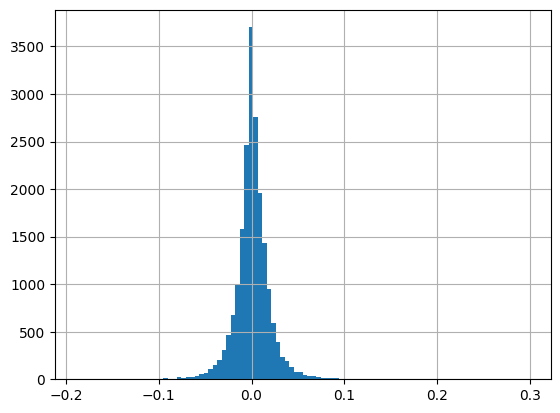

In [ ]:
df['daily_return'] = df.groupby("Stock Type")["Close"].pct_change()
df['daily_return'].hist(bins=100)

In [ ]:
def generate_direction_labels(df, stock_col="Stock", date_col="Date", price_col="Close",
                              up_thresh=0.0075, down_thresh=0.0075):
    df = df.sort_values([stock_col, date_col]).copy()

    df["Next_Close"] = df.groupby(stock_col)[price_col].shift(-1)

    df["Return"] = (df["Next_Close"] - df[price_col]) / df[price_col]

    def classify_movement(x):
        if x > up_thresh:
            return 1   # UP
        elif x < -down_thresh:
            return -1  # DOWN
        else:
            return 0   # SIDEWAYS

    df["Target"] = df["Return"].apply(classify_movement)

    df = df.dropna(subset=["Target"])
    df = df.astype({"Target": int})

    return df


In [ ]:
df = generate_direction_labels(df, stock_col="Stock Type")

In [ ]:
print(df.columns)
print(df.info())

Index(['Stock Type', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Year',
       'MonthLength', 'DayOfYear_sin', 'DayOfYear_cos', 'Month_sin',
       'Month_cos', 'Day_sin', 'Day_cos', 'DayOfWeek_sin', 'DayOfWeek_cos',
       'SMA_5', 'SMA_10', 'SMA_20', 'SMA_30', 'RSI_14', 'BB_High', 'BB_Low',
       'BB_Middle', 'BB_Width', 'MACD', 'MACD_Signal', 'MACD_Diff',
       'Price Range', 'Volatility_5', 'Volatility_10', 'Return_5',
       'Price Change', 'Prev Close', 'daily_return', 'Forward_Close',
       'Forward_Return', 'Target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 19965 entries, 33 to 20129
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Stock Type      19965 non-null  int64         
 1   Date            19965 non-null  datetime64[ns]
 2   Close           19965 non-null  float64       
 3   High            19965 non-null  float64       
 4   Low           

In [ ]:
df = df.dropna(subset=["Target"])

In [ ]:
df["Target"].value_counts(normalize=True).sort_index()

,proportion
Target,
-1,0.281192
0,0.348560
1,0.370248


In [ ]:
target_map = {-1: 0, 0: 1, 1: 2}
df['Target'] = df['Target'].map(target_map)

In [ ]:
df["Target"].value_counts(normalize=True).sort_index()

,proportion
Target,
0,0.281192
1,0.348560
2,0.370248


In [ ]:
df = df.drop(columns=["Next_Close", "Return", "daily_return"], axis=1)

In [ ]:
df

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,...,MACD,MACD_Signal,MACD_Diff,Price Range,Volatility_5,Volatility_10,Return_5,Price Change,Prev Close,Target
33,0,2009-05-19,4.551786,4.618214,4.490714,4.529286,372422400,2009,31,0.680773,...,0.063851,0.095607,-0.031756,0.127500,0.116616,0.142204,0.024353,0.022500,4.523214,0
34,0,2009-05-20,4.495357,4.614643,4.475000,4.558214,388584000,2009,31,0.668064,...,0.059576,0.088401,-0.028824,0.139643,0.080491,0.119620,0.053394,-0.062857,4.551786,2
35,0,2009-05-21,4.435000,4.527857,4.388929,4.469643,407946000,2009,31,0.655156,...,0.050733,0.080867,-0.030134,0.138928,0.072134,0.112732,0.010004,-0.034643,4.495357,2
36,0,2009-05-22,4.375000,4.435000,4.348214,4.430357,297998400,2009,31,0.642055,...,0.038441,0.072382,-0.033941,0.086786,0.071115,0.104341,0.000654,-0.055357,4.435000,2
37,0,2009-05-26,4.670714,4.672500,4.448214,4.455714,558376350,2009,31,0.587785,...,0.051961,0.068298,-0.016337,0.224286,0.113514,0.113118,0.032610,0.215000,4.375000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125,4,2025-03-26,113.760002,118.839996,112.709999,118.730003,293463300,2025,31,0.994218,...,-2.414845,-3.169322,0.754476,6.129997,3.014096,2.695324,-0.031995,-4.970001,120.690002,0
20126,4,2025-03-27,111.430000,114.449997,110.660004,111.349998,236902100,2025,31,0.995919,...,-2.747671,-3.084991,0.337321,3.789993,4.332341,3.374410,-0.059900,0.080002,113.760002,0
20127,4,2025-03-28,109.669998,112.870003,109.070000,111.489998,229872500,2025,31,0.997325,...,-3.117518,-3.091497,-0.026021,3.800003,5.370925,3.921562,-0.068224,-1.820000,111.430000,1
20128,4,2025-03-31,108.379997,110.959999,103.650002,105.129997,299212700,2025,31,0.999769,...,-3.474663,-3.168130,-0.306533,7.309998,4.857546,4.524295,-0.107322,3.250000,109.669998,1


In [ ]:
targets = ['Target']

In [ ]:
LAG_DAYS = [1, 2, 3, 5]

cols_to_lag = ['Close', 'Return_5', 'Volatility_5', 'Volatility_10',
               'Price Change', 'RSI_14', 'MACD']

df = df.sort_values(['Stock Type', 'Date'])

for col in cols_to_lag:
    for lag in LAG_DAYS:
        df[f'{col}_lag{lag}'] = df.groupby('Stock Type')[col].shift(lag)


In [ ]:
df.dropna(inplace=True)

In [ ]:
cyclical_cols = [
    'DayOfYear_sin', 'DayOfYear_cos',
    'Day_sin', 'Day_cos',
    'DayOfWeek_sin', 'DayOfWeek_cos',
    'Month_sin', 'Month_cos', 'MonthLength'
]

cap_out_done_cols = [
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return'
]

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in (cyclical_cols
                  + cap_out_done_cols + targets)]

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

for col in numerical_cols:
    df = cap_outliers_iqr(df, col)

df.tail()

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,...,Price Change_lag3,Price Change_lag5,RSI_14_lag1,RSI_14_lag2,RSI_14_lag3,RSI_14_lag5,MACD_lag1,MACD_lag2,MACD_lag3,MACD_lag5
20125,4,2025-03-26,113.760002,118.839996,112.709999,118.730003,293463300,2025,31,0.994218,...,0.759995,0.250000,49.671875,50.454289,46.415791,46.167548,-1.414951,-1.411677,-1.409974,-1.408602
20126,4,2025-03-27,111.430000,114.449997,110.660004,111.349998,236902100,2025,31,0.995919,...,1.055553,1.051185,42.793290,49.671875,50.454289,47.215287,-1.414951,-1.411677,-1.409974,-1.408602
20127,4,2025-03-28,109.669998,112.870003,109.070000,111.489998,229872500,2025,31,0.997325,...,0.139999,0.759995,40.750028,42.793290,49.671875,46.415791,-1.414951,-1.411677,-1.409974,-1.408602
20128,4,2025-03-31,108.379997,110.959999,103.650002,105.129997,299212700,2025,31,0.999769,...,-1.005929,1.051185,39.226436,40.750028,42.793290,50.454289,-1.414951,-1.411677,-1.409974,-1.408602
20129,4,2025-04-01,110.150002,110.199997,106.470001,108.519997,222614000,2025,30,0.999991,...,0.080002,0.139999,38.101961,39.226436,40.750028,49.671875,-1.414951,-1.411677,-1.409974,-1.408602


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19940 entries, 38 to 20129
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Stock Type          19940 non-null  int64         
 1   Date                19940 non-null  datetime64[ns]
 2   Close               19940 non-null  float64       
 3   High                19940 non-null  float64       
 4   Low                 19940 non-null  float64       
 5   Open                19940 non-null  float64       
 6   Volume              19940 non-null  int64         
 7   Year                19940 non-null  int32         
 8   MonthLength         19940 non-null  int32         
 9   DayOfYear_sin       19940 non-null  float64       
 10  DayOfYear_cos       19940 non-null  float64       
 11  Month_sin           19940 non-null  float64       
 12  Month_cos           19940 non-null  float64       
 13  Day_sin             19940 non-null  float64       

In [ ]:
cols_to_skip_log = ['Stock Type', 'Year', 'DayOfYear_sin', 'DayOfWeek_sin',
                 'DayOfYear_cos', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos',
                 'MonthLength', 'DayOfWeek', 'DayOfWeek_cos', 'RSI_14', 'MACD',
                 'MACD_Signal', 'MACD_Diff', 'MACD_lag1', 'MACD_lag2', 'MACD_lag3', 'MACD_lag5',
                 'Return', 'Return_5', 'Prev Return','Return_lag1', 'Return_lag2',
                 'Return_lag3', 'Return_lag5','Return_5_lag1', 'Return_5_lag2',
                 'Return_5_lag3', 'Return_5_lag5', 'Price Change', 'Price Change_lag1',
                 'Price Change_lag2', 'Price Change_lag3', 'Price Change_lag5',
                 'RSI_14_lag1', 'RSI_14_lag2', 'RSI_14_lag3', 'RSI_14_lag5',
                 'BB_Low', 'Target'
]

In [ ]:
print("Skewness before transformation:")
for col in df.select_dtypes(include=np.number).columns :
  if col not in cols_to_skip_log:
    print(f"{col}: {df[col].skew():.2f}")

Skewness before transformation:
Close: 1.11
High: 1.11
Low: 1.11
Open: 1.11
Volume: 1.24
SMA_5: 1.11
SMA_10: 1.12
SMA_20: 1.12
SMA_30: 1.12
BB_High: 1.07
BB_Middle: 1.12
BB_Width: 0.85
Price Range: 1.18
Volatility_5: 1.17
Volatility_10: 1.17
Prev Close: 1.11
Close_lag1: 1.11
Close_lag2: 1.12
Close_lag3: 1.12
Close_lag5: 1.12
Volatility_5_lag1: 1.17
Volatility_5_lag2: 1.17
Volatility_5_lag3: 1.17
Volatility_5_lag5: 1.17
Volatility_10_lag1: 1.18
Volatility_10_lag2: 1.18
Volatility_10_lag3: 1.18
Volatility_10_lag5: 1.18


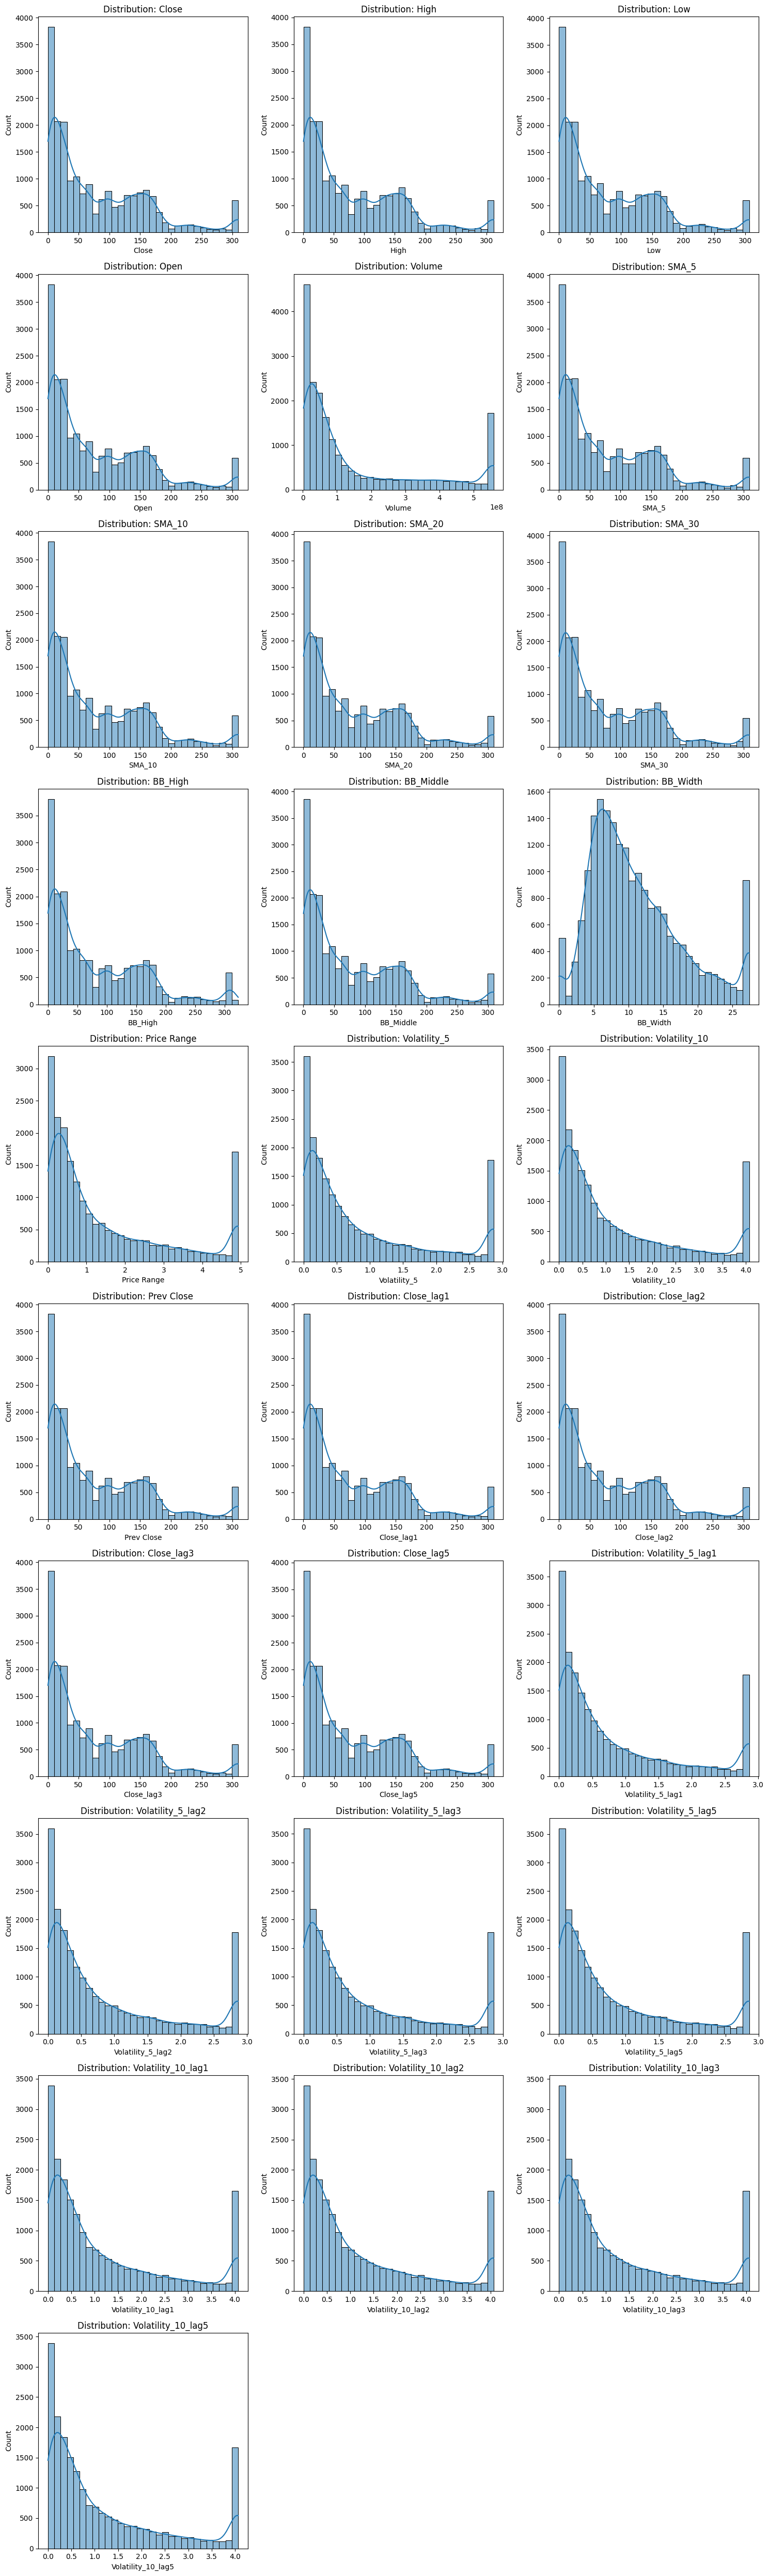

In [ ]:
cols_to_plot = [col for col in df.select_dtypes(include=np.number).columns if col not in cols_to_skip_log]
n = len(cols_to_plot)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(cols_to_plot):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution: {col}")
plt.tight_layout()
plt.show()

In [ ]:
numerical_cols_to_transform = [col for col in df.select_dtypes(include=np.number).columns
                               if col not in cols_to_skip_log]
for col in numerical_cols_to_transform:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)
    if (df[col] < 0).any():
        print(f"Warning: Column '{col}' has negative values. Skipping log transform.")
        continue
    if df[col].skew() > 0.5:
        df[col] = np.log1p(df[col])

In [ ]:
# Show skewness after transformation
print("Skewness after transformation:")
for col in df.select_dtypes(include=np.number).columns:
    if col not in cols_to_skip_log:
        print(f"{col}: {df[col].skew():.2f}")

Skewness after transformation:
Close: -0.82
High: -0.82
Low: -0.82
Open: -0.82
Volume: -0.14
SMA_5: -0.82
SMA_10: -0.82
SMA_20: -0.81
SMA_30: -0.81
BB_High: -0.83
BB_Middle: -0.81
BB_Width: -1.04
Price Range: 0.56
Volatility_5: 0.70
Volatility_10: 0.59
Prev Close: -0.82
Close_lag1: -0.82
Close_lag2: -0.82
Close_lag3: -0.82
Close_lag5: -0.82
Volatility_5_lag1: 0.70
Volatility_5_lag2: 0.70
Volatility_5_lag3: 0.70
Volatility_5_lag5: 0.70
Volatility_10_lag1: 0.59
Volatility_10_lag2: 0.59
Volatility_10_lag3: 0.59
Volatility_10_lag5: 0.59


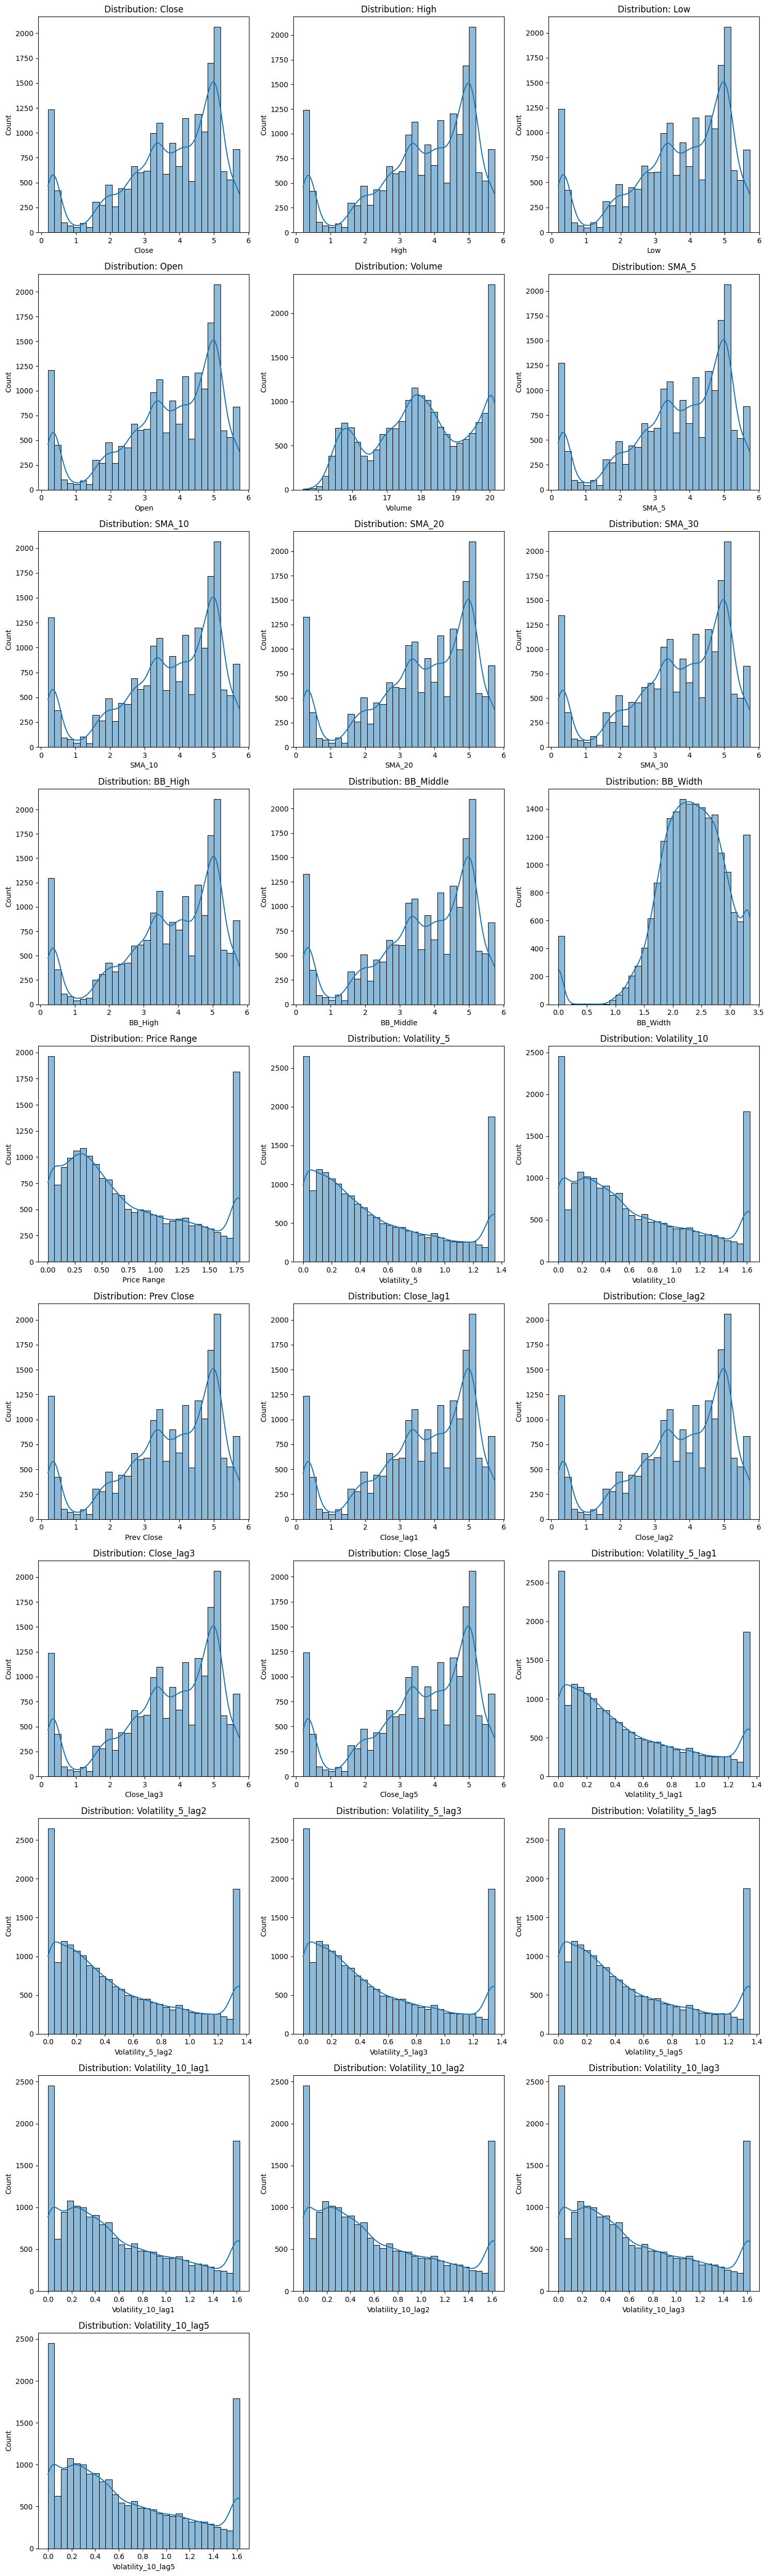

In [ ]:
cols_to_plot = [col for col in df.select_dtypes(include=np.number).columns if col not in cols_to_skip_log]
n = len(cols_to_plot)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(cols_to_plot):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution: {col}")
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19940 entries, 38 to 20129
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Stock Type          19940 non-null  int64         
 1   Date                19940 non-null  datetime64[ns]
 2   Close               19940 non-null  float64       
 3   High                19940 non-null  float64       
 4   Low                 19940 non-null  float64       
 5   Open                19940 non-null  float64       
 6   Volume              19940 non-null  float64       
 7   Year                19940 non-null  int32         
 8   MonthLength         19940 non-null  int32         
 9   DayOfYear_sin       19940 non-null  float64       
 10  DayOfYear_cos       19940 non-null  float64       
 11  Month_sin           19940 non-null  float64       
 12  Month_cos           19940 non-null  float64       
 13  Day_sin             19940 non-null  float64       

In [ ]:
# cols_to_skip_scale = [
#     'Stock Type', 'Year', 'DayOfYear_sin', 'DayOfWeek_sin',
#     'DayOfYear_cos', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos',
#     'MonthLength', 'DayOfWeek', 'DayOfWeek_cos'
# ]

In [ ]:
# scaler = StandardScaler()
# columns_to_scale = [col for col in df.select_dtypes(include=np.number).columns if col not in (cols_to_skip_scale + targets)]
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [ ]:
# df.info()

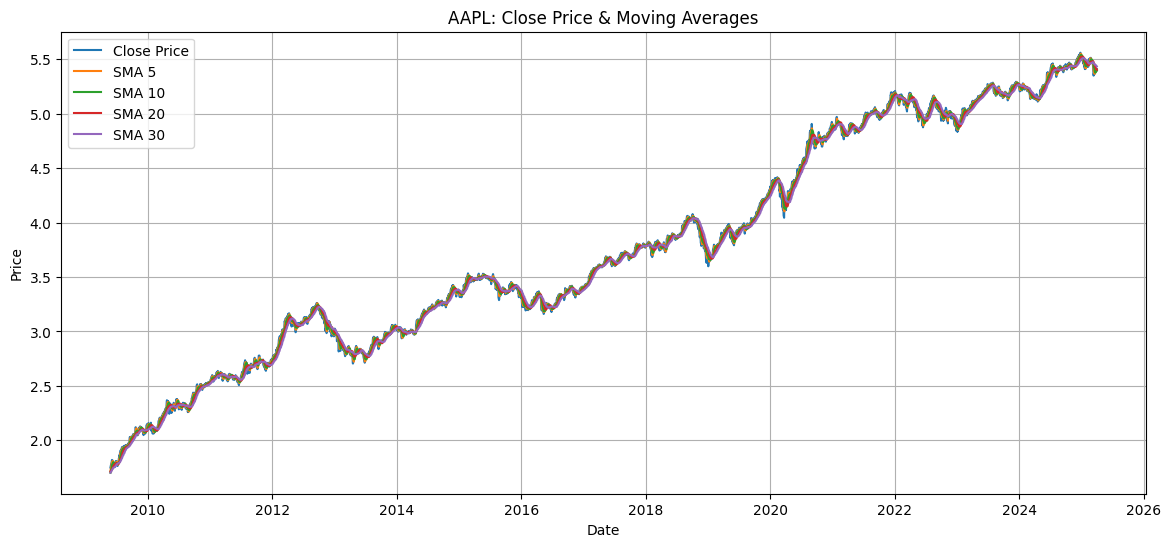

In [ ]:
sample = df[df['Stock Type'] == le.transform(['AAPL'])[0]].copy()
sample['Date'] = pd.to_datetime(sample['Date'])
sample = sample.dropna(subset=['Close', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_30'])

plt.figure(figsize=(14, 6))
plt.plot(sample['Date'], sample['Close'], label='Close Price')
plt.plot(sample['Date'], sample['SMA_5'], label='SMA 5')
plt.plot(sample['Date'], sample['SMA_10'], label='SMA 10')
plt.plot(sample['Date'], sample['SMA_20'], label='SMA 20')
plt.plot(sample['Date'], sample['SMA_30'], label='SMA 30')
plt.title("AAPL: Close Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


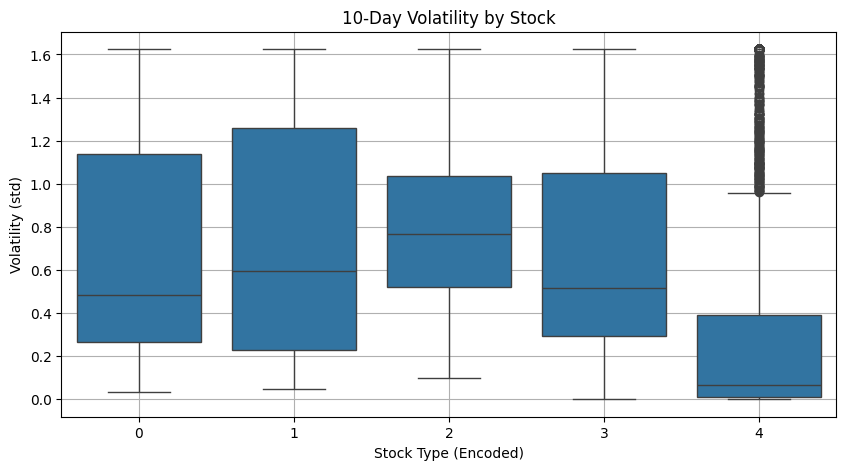

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Stock Type', y='Volatility_10', data=df)
plt.title("10-Day Volatility by Stock")
plt.xlabel("Stock Type (Encoded)")
plt.ylabel("Volatility (std)")
plt.grid(True)
plt.show()

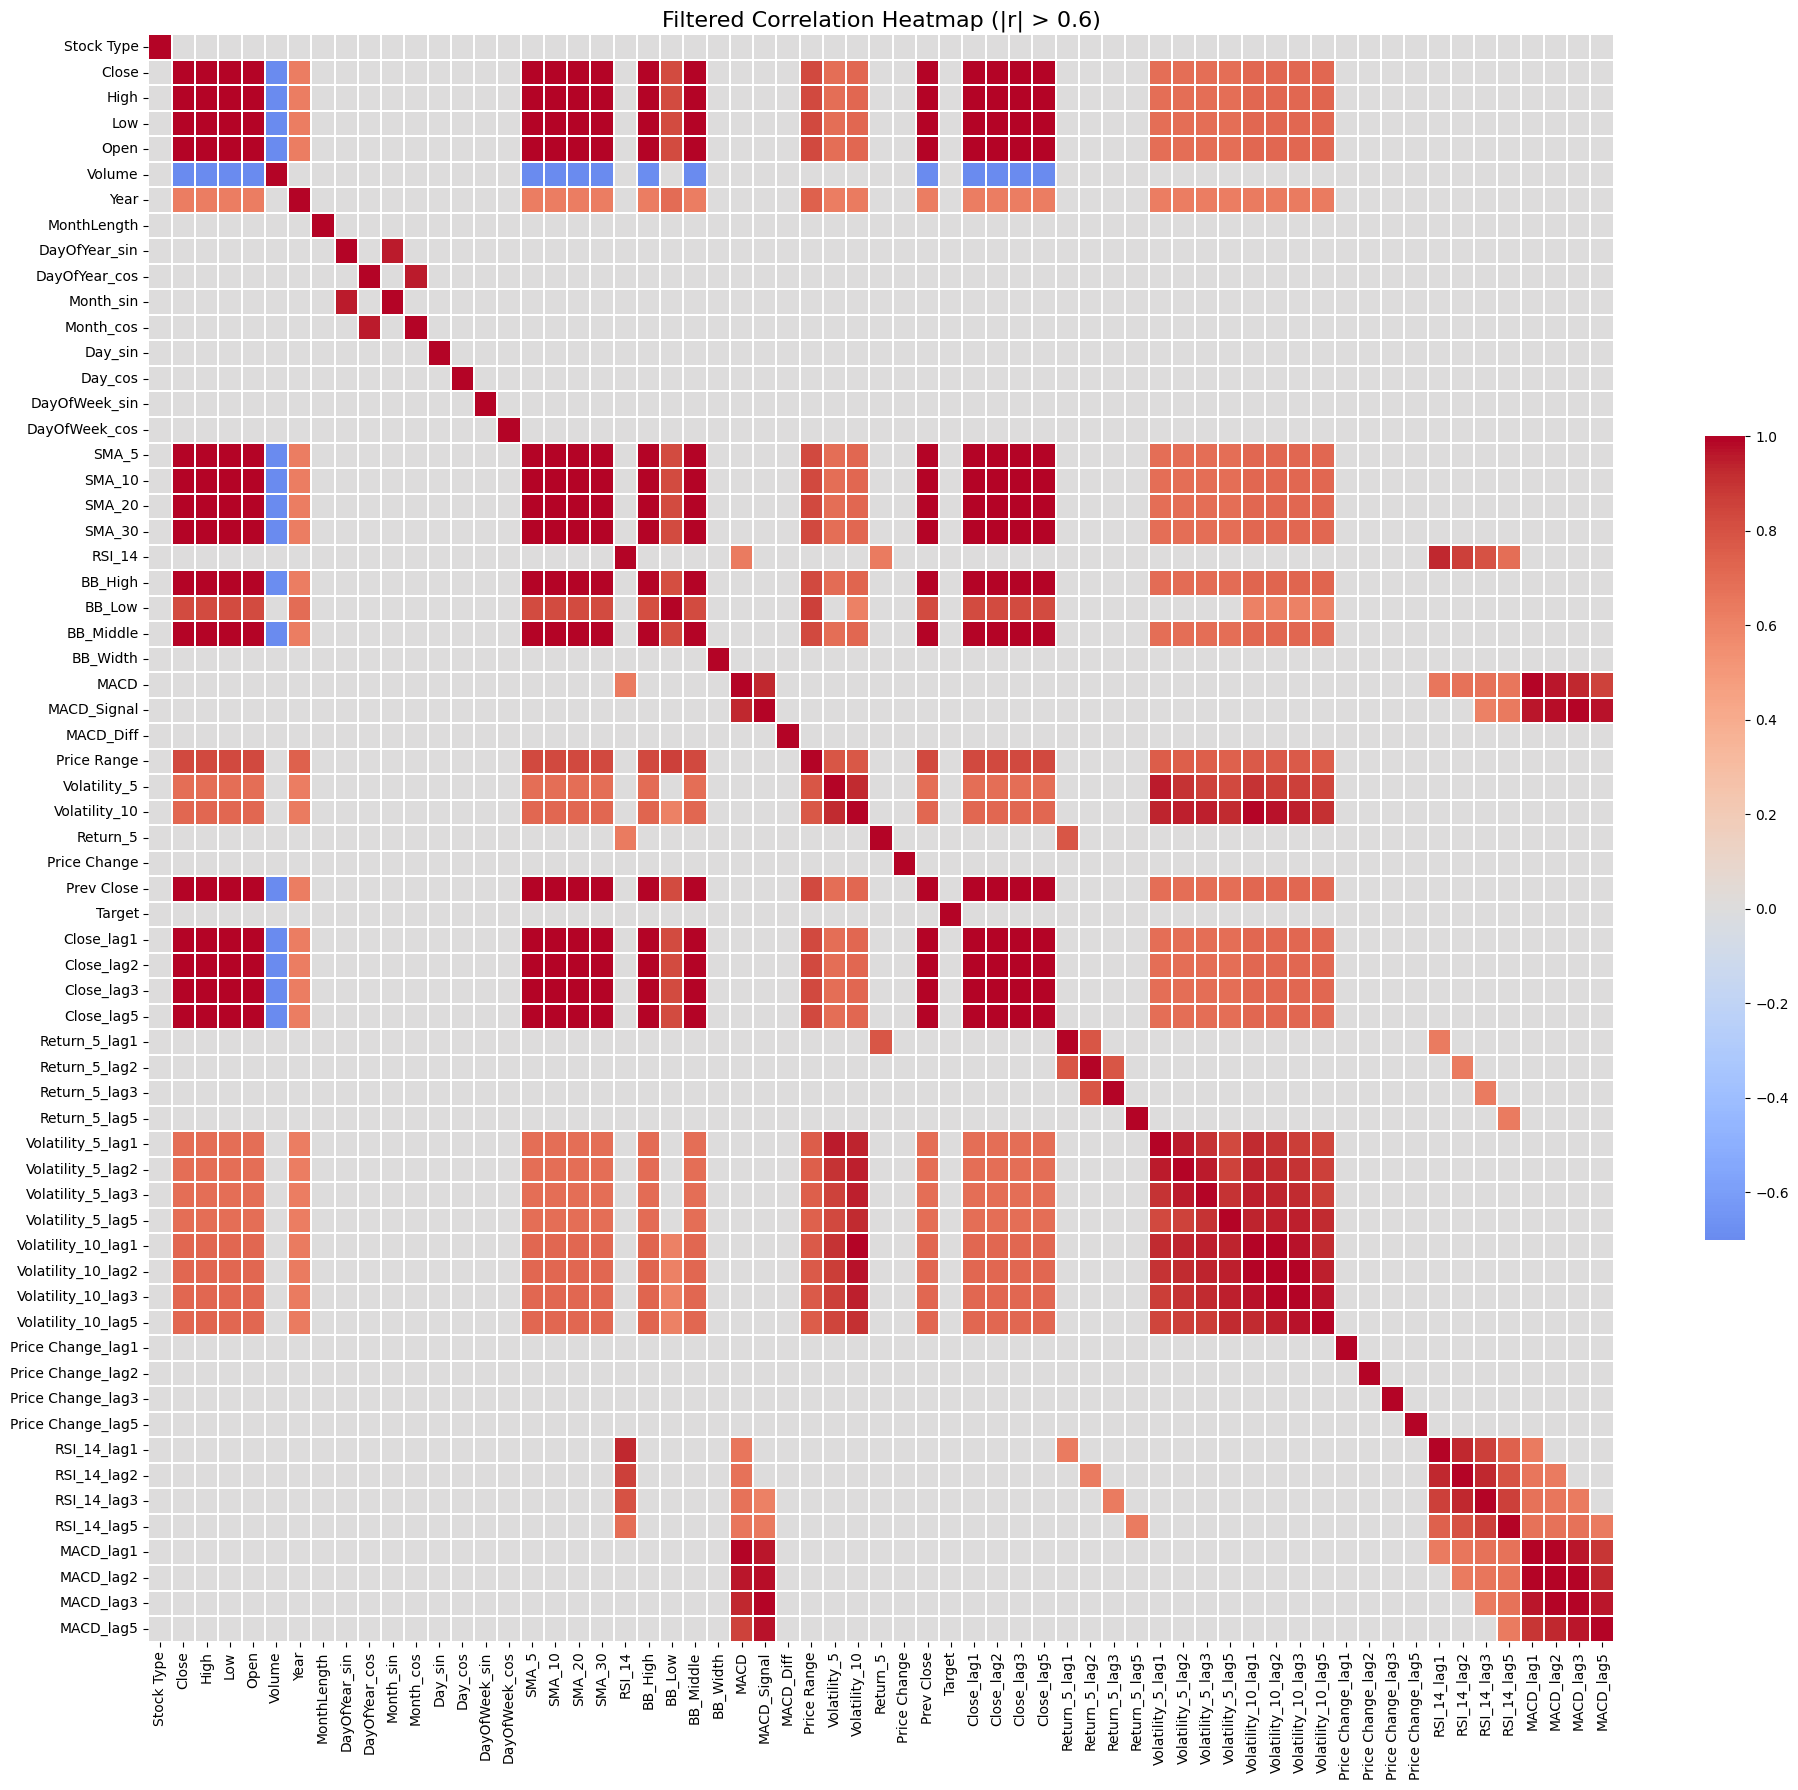

In [ ]:
corr = df.select_dtypes(include='number').corr()

mask = np.abs(corr) < 0.6
filtered_corr = corr.copy()
filtered_corr[mask] = 0

plt.figure(figsize=(20, 18))
sns.heatmap(filtered_corr, cmap='coolwarm', center=0, linewidths=0.1,
            annot=False, cbar_kws={'shrink': 0.5})
plt.title("Filtered Correlation Heatmap (|r| > 0.6)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# corr_matrix = df.select_dtypes(include='number').corr().abs()

# mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
# corr_filtered = corr_matrix.where(mask)

# high_corr_pairs = (
#     corr_filtered.unstack()
#     .dropna()
#     .sort_values(ascending=False)
# )

# high_corr_df = high_corr_pairs.reset_index()
# high_corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']


In [ ]:
# high_corr_df.to_csv('high_corr_pairs.csv', index=False)

In [ ]:
df.columns.tolist()

['Stock Type',
 'Date',
 'Close',
 'High',
 'Low',
 'Open',
 'Volume',
 'Year',
 'MonthLength',
 'DayOfYear_sin',
 'DayOfYear_cos',
 'Month_sin',
 'Month_cos',
 'Day_sin',
 'Day_cos',
 'DayOfWeek_sin',
 'DayOfWeek_cos',
 'SMA_5',
 'SMA_10',
 'SMA_20',
 'SMA_30',
 'RSI_14',
 'BB_High',
 'BB_Low',
 'BB_Middle',
 'BB_Width',
 'MACD',
 'MACD_Signal',
 'MACD_Diff',
 'Price Range',
 'Volatility_5',
 'Volatility_10',
 'Return_5',
 'Price Change',
 'Prev Close',
 'Target',
 'Close_lag1',
 'Close_lag2',
 'Close_lag3',
 'Close_lag5',
 'Return_5_lag1',
 'Return_5_lag2',
 'Return_5_lag3',
 'Return_5_lag5',
 'Volatility_5_lag1',
 'Volatility_5_lag2',
 'Volatility_5_lag3',
 'Volatility_5_lag5',
 'Volatility_10_lag1',
 'Volatility_10_lag2',
 'Volatility_10_lag3',
 'Volatility_10_lag5',
 'Price Change_lag1',
 'Price Change_lag2',
 'Price Change_lag3',
 'Price Change_lag5',
 'RSI_14_lag1',
 'RSI_14_lag2',
 'RSI_14_lag3',
 'RSI_14_lag5',
 'MACD_lag1',
 'MACD_lag2',
 'MACD_lag3',
 'MACD_lag5']

In [ ]:
# def drop_highly_correlated_features(
#     df,
#     threshold=0.995,
#     drop_cols=['Date', 'Stock Type', 'Prev Close', 'Close_lag1',
#     'MACD_lag1', 'Volatility_5_lag1', 'SMA_20', 'High', 'Target', 'Return',
#                'Price Change'],
#     keep='first'
# ):
#     df_numeric = df.drop(columns=drop_cols, errors='ignore')
#     df_numeric = df_numeric.select_dtypes(include=[np.number])

#     corr_matrix = df_numeric.corr().abs()
#     upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#     to_drop = [
#         column for column in upper_triangle.columns
#         if any(upper_triangle[column] > threshold)
#     ]

#     if keep == 'last':
#         to_keep = df_numeric.columns.difference(to_drop)
#         df_filtered = df[to_keep.tolist() + drop_cols]
#     else:
#         df_filtered = df.drop(columns=to_drop)

#     return df_filtered, to_drop

# # # Check which features drop at whcih feature level

# # for t in [0.99, 0.98, 0.97, 0.95, 0.94, 0.92, 0.91, 0.90]:
# #   _, dropped = drop_highly_correlated_features(df, threshold=t, keep='last')
# #   print(f"Threshold {t}: Dropping {len(dropped)} features")
# #   print(dropped)
# #   print()


In [ ]:
# filtered_df, to_drop = drop_highly_correlated_features(df, threshold=0.95)
# print("Dropped:", to_drop)


In [ ]:
# processed_df = filtered_df.copy()
processed_df = df.copy()
processed_df.to_csv(price_data_path / 'processed_price_data.csv', index=False)

In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19940 entries, 38 to 20129
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Stock Type          19940 non-null  int64         
 1   Date                19940 non-null  datetime64[ns]
 2   Close               19940 non-null  float64       
 3   High                19940 non-null  float64       
 4   Low                 19940 non-null  float64       
 5   Open                19940 non-null  float64       
 6   Volume              19940 non-null  float64       
 7   Year                19940 non-null  int32         
 8   MonthLength         19940 non-null  int32         
 9   DayOfYear_sin       19940 non-null  float64       
 10  DayOfYear_cos       19940 non-null  float64       
 11  Month_sin           19940 non-null  float64       
 12  Month_cos           19940 non-null  float64       
 13  Day_sin             19940 non-null  float64       

In [ ]:
processed_df

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,...,Price Change_lag3,Price Change_lag5,RSI_14_lag1,RSI_14_lag2,RSI_14_lag3,RSI_14_lag5,MACD_lag1,MACD_lag2,MACD_lag3,MACD_lag5
38,0,2009-05-27,1.749510,1.761423,1.736133,1.741593,20.140544,2009,31,0.573772,...,-0.034643,0.022500,60.483361,47.344330,50.508363,57.176289,0.051961,0.038441,0.050733,0.063851
39,0,2009-05-28,1.761975,1.763935,1.743157,1.751991,20.004909,2009,31,0.559589,...,-0.055357,-0.062857,63.194877,60.483361,47.344330,53.871338,0.068430,0.051961,0.038441,0.059576
40,0,2009-05-29,1.766503,1.767052,1.754465,1.763935,19.939175,2009,31,0.545240,...,0.215000,-0.034643,65.465716,63.194877,60.483361,50.508363,0.086307,0.068430,0.051961,0.050733
41,0,2009-06-01,1.787883,1.791700,1.767662,1.770524,19.930297,2009,30,0.501242,...,0.045357,-0.055357,66.286341,65.465716,63.194877,47.344330,0.101438,0.086307,0.068430,0.038441
42,0,2009-06-02,1.788719,1.799704,1.781889,1.785730,19.938494,2009,30,0.486273,...,0.057858,0.215000,69.963463,66.286341,65.465716,60.483361,0.122223,0.101438,0.086307,0.051961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125,4,2025-03-26,4.742843,4.786157,4.733651,4.785239,19.497263,2025,31,0.994218,...,0.759995,0.250000,49.671875,50.454289,46.415791,46.167548,-1.414951,-1.411677,-1.409974,-1.408602
20126,4,2025-03-27,4.722331,4.748838,4.715459,4.721619,19.283158,2025,31,0.995919,...,1.055553,1.051185,42.793290,49.671875,50.454289,47.215287,-1.414951,-1.411677,-1.409974,-1.408602
20127,4,2025-03-28,4.706553,4.735057,4.701117,4.722864,19.253035,2025,31,0.997325,...,0.139999,0.759995,40.750028,42.793290,49.671875,46.415791,-1.414951,-1.411677,-1.409974,-1.408602
20128,4,2025-03-31,4.694828,4.718142,4.650621,4.664665,19.516665,2025,31,0.999769,...,-1.005929,1.051185,39.226436,40.750028,42.793290,50.454289,-1.414951,-1.411677,-1.409974,-1.408602


In [ ]:
price_df = processed_df.copy()
sentiment_df = pd.read_csv(sentiment_data_path / 'sentiment_fuse_ready.csv')

In [ ]:
print(price_df.info())
print(sentiment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19940 entries, 0 to 19939
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Stock Type          19940 non-null  int64  
 1   Date                19940 non-null  object 
 2   Close               19940 non-null  float64
 3   High                19940 non-null  float64
 4   Low                 19940 non-null  float64
 5   Open                19940 non-null  float64
 6   Volume              19940 non-null  float64
 7   Year                19940 non-null  int64  
 8   MonthLength         19940 non-null  int64  
 9   DayOfYear_sin       19940 non-null  float64
 10  DayOfYear_cos       19940 non-null  float64
 11  Month_sin           19940 non-null  float64
 12  Month_cos           19940 non-null  float64
 13  Day_sin             19940 non-null  float64
 14  Day_cos             19940 non-null  float64
 15  DayOfWeek_sin       19940 non-null  float64
 16  DayO

In [ ]:
price_df['Date'] = pd.to_datetime(price_df['Date'])

In [ ]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16133 entries, 0 to 16132
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                16133 non-null  datetime64[ns]
 1   Stock Type          16133 non-null  int64         
 2   Weighted_Sentiment  16133 non-null  float64       
 3   Mean_Sentiment      16133 non-null  float64       
 4   Headline_Count      16133 non-null  int64         
 5   Sentiment_Label     16133 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 756.4+ KB


In [ ]:
merged_df = pd.merge(
    price_df,
    sentiment_df,
    how='left',
    on=['Date', 'Stock Type']
)

In [ ]:
merged_df = merged_df.copy()
merged_df['Target'] = merged_df['Target'].astype(int)

In [ ]:
merged_df

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,...,RSI_14_lag3,RSI_14_lag5,MACD_lag1,MACD_lag2,MACD_lag3,MACD_lag5,Weighted_Sentiment,Mean_Sentiment,Headline_Count,Sentiment_Label
0,0,2009-05-27,1.749510,1.761423,1.736133,1.741593,20.140544,2009,31,0.573772,...,50.508363,57.176289,0.051961,0.038441,0.050733,0.063851,NaN,NaN,NaN,NaN
1,0,2009-05-28,1.761975,1.763935,1.743157,1.751991,20.004909,2009,31,0.559589,...,47.344330,53.871338,0.068430,0.051961,0.038441,0.059576,NaN,NaN,NaN,NaN
2,0,2009-05-29,1.766503,1.767052,1.754465,1.763935,19.939175,2009,31,0.545240,...,60.483361,50.508363,0.086307,0.068430,0.051961,0.050733,NaN,NaN,NaN,NaN
3,0,2009-06-01,1.787883,1.791700,1.767662,1.770524,19.930297,2009,30,0.501242,...,63.194877,47.344330,0.101438,0.086307,0.068430,0.038441,NaN,NaN,NaN,NaN
4,0,2009-06-02,1.788719,1.799704,1.781889,1.785730,19.938494,2009,30,0.486273,...,65.465716,60.483361,0.122223,0.101438,0.086307,0.051961,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19935,4,2025-03-26,4.742843,4.786157,4.733651,4.785239,19.497263,2025,31,0.994218,...,46.415791,46.167548,-1.414951,-1.411677,-1.409974,-1.408602,-0.357143,-0.357143,14.0,negative
19936,4,2025-03-27,4.722331,4.748838,4.715459,4.721619,19.283158,2025,31,0.995919,...,50.454289,47.215287,-1.414951,-1.411677,-1.409974,-1.408602,0.000000,0.000000,12.0,neutral
19937,4,2025-03-28,4.706553,4.735057,4.701117,4.722864,19.253035,2025,31,0.997325,...,49.671875,46.415791,-1.414951,-1.411677,-1.409974,-1.408602,-0.147059,-0.147059,34.0,negative
19938,4,2025-03-31,4.694828,4.718142,4.650621,4.664665,19.516665,2025,31,0.999769,...,42.793290,50.454289,-1.414951,-1.411677,-1.409974,-1.408602,-0.342857,-0.342857,35.0,negative


In [ ]:
merged_df['Weighted_Sentiment'] = merged_df['Weighted_Sentiment'].fillna(0.0)
merged_df['Sentiment_Label'] = merged_df['Sentiment_Label'].fillna('neutral')
merged_df['Mean_Sentiment'] = merged_df['Mean_Sentiment'].fillna(0.0)
merged_df['Headline_Count'] = merged_df['Headline_Count'].fillna(0)
merged_df['Has_Sentiment'] = (merged_df['Headline_Count'] > 0).astype(int)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19940 entries, 0 to 19939
Data columns (total 69 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Stock Type          19940 non-null  int64         
 1   Date                19940 non-null  datetime64[ns]
 2   Close               19940 non-null  float64       
 3   High                19940 non-null  float64       
 4   Low                 19940 non-null  float64       
 5   Open                19940 non-null  float64       
 6   Volume              19940 non-null  float64       
 7   Year                19940 non-null  int64         
 8   MonthLength         19940 non-null  int64         
 9   DayOfYear_sin       19940 non-null  float64       
 10  DayOfYear_cos       19940 non-null  float64       
 11  Month_sin           19940 non-null  float64       
 12  Month_cos           19940 non-null  float64       
 13  Day_sin             19940 non-null  float64   

<Axes: xlabel='Weighted_Sentiment', ylabel='Count'>

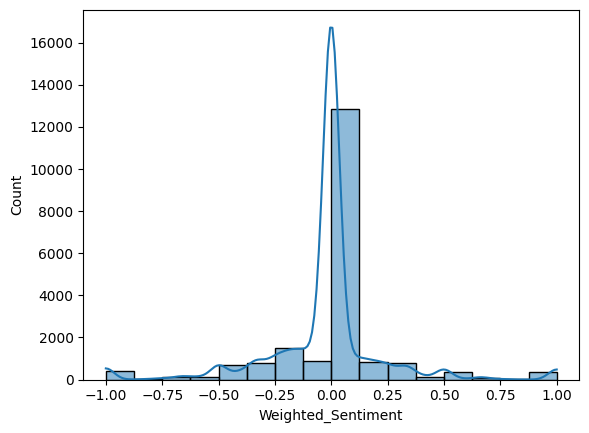

In [ ]:
sns.histplot(merged_df["Weighted_Sentiment"], kde=True)

In [ ]:
merged_df

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,...,RSI_14_lag5,MACD_lag1,MACD_lag2,MACD_lag3,MACD_lag5,Weighted_Sentiment,Mean_Sentiment,Headline_Count,Sentiment_Label,Has_Sentiment
0,0,2009-05-27,1.749510,1.761423,1.736133,1.741593,20.140544,2009,31,0.573772,...,57.176289,0.051961,0.038441,0.050733,0.063851,0.000000,0.000000,0.0,neutral,0
1,0,2009-05-28,1.761975,1.763935,1.743157,1.751991,20.004909,2009,31,0.559589,...,53.871338,0.068430,0.051961,0.038441,0.059576,0.000000,0.000000,0.0,neutral,0
2,0,2009-05-29,1.766503,1.767052,1.754465,1.763935,19.939175,2009,31,0.545240,...,50.508363,0.086307,0.068430,0.051961,0.050733,0.000000,0.000000,0.0,neutral,0
3,0,2009-06-01,1.787883,1.791700,1.767662,1.770524,19.930297,2009,30,0.501242,...,47.344330,0.101438,0.086307,0.068430,0.038441,0.000000,0.000000,0.0,neutral,0
4,0,2009-06-02,1.788719,1.799704,1.781889,1.785730,19.938494,2009,30,0.486273,...,60.483361,0.122223,0.101438,0.086307,0.051961,0.000000,0.000000,0.0,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19935,4,2025-03-26,4.742843,4.786157,4.733651,4.785239,19.497263,2025,31,0.994218,...,46.167548,-1.414951,-1.411677,-1.409974,-1.408602,-0.357143,-0.357143,14.0,negative,1
19936,4,2025-03-27,4.722331,4.748838,4.715459,4.721619,19.283158,2025,31,0.995919,...,47.215287,-1.414951,-1.411677,-1.409974,-1.408602,0.000000,0.000000,12.0,neutral,1
19937,4,2025-03-28,4.706553,4.735057,4.701117,4.722864,19.253035,2025,31,0.997325,...,46.415791,-1.414951,-1.411677,-1.409974,-1.408602,-0.147059,-0.147059,34.0,negative,1
19938,4,2025-03-31,4.694828,4.718142,4.650621,4.664665,19.516665,2025,31,0.999769,...,50.454289,-1.414951,-1.411677,-1.409974,-1.408602,-0.342857,-0.342857,35.0,negative,1


In [ ]:
merged_df = merged_df.ffill().fillna(0)

In [ ]:
target_col = "Target"
date_col = "Date"
stock_col = "Stock Type"

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19940 entries, 0 to 19939
Data columns (total 69 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Stock Type          19940 non-null  int64         
 1   Date                19940 non-null  datetime64[ns]
 2   Close               19940 non-null  float64       
 3   High                19940 non-null  float64       
 4   Low                 19940 non-null  float64       
 5   Open                19940 non-null  float64       
 6   Volume              19940 non-null  float64       
 7   Year                19940 non-null  int64         
 8   MonthLength         19940 non-null  int64         
 9   DayOfYear_sin       19940 non-null  float64       
 10  DayOfYear_cos       19940 non-null  float64       
 11  Month_sin           19940 non-null  float64       
 12  Month_cos           19940 non-null  float64       
 13  Day_sin             19940 non-null  float64   

In [ ]:
# One-hot encoded the 'Stock Type'
stock_onehot = pd.get_dummies(merged_df['Stock Type'], prefix='Stock').astype(int)

# Concatenated back to the main df
merged_df = pd.concat([merged_df, stock_onehot], axis=1)

In [ ]:
stock_onehot_cols = ['Stock_0', 'Stock_1', 'Stock_2', 'Stock_3', 'Stock_4']

In [ ]:
merged_df

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,...,Weighted_Sentiment,Mean_Sentiment,Headline_Count,Sentiment_Label,Has_Sentiment,Stock_0,Stock_1,Stock_2,Stock_3,Stock_4
0,0,2009-05-27,1.749510,1.761423,1.736133,1.741593,20.140544,2009,31,0.573772,...,0.000000,0.000000,0.0,neutral,0,1,0,0,0,0
1,0,2009-05-28,1.761975,1.763935,1.743157,1.751991,20.004909,2009,31,0.559589,...,0.000000,0.000000,0.0,neutral,0,1,0,0,0,0
2,0,2009-05-29,1.766503,1.767052,1.754465,1.763935,19.939175,2009,31,0.545240,...,0.000000,0.000000,0.0,neutral,0,1,0,0,0,0
3,0,2009-06-01,1.787883,1.791700,1.767662,1.770524,19.930297,2009,30,0.501242,...,0.000000,0.000000,0.0,neutral,0,1,0,0,0,0
4,0,2009-06-02,1.788719,1.799704,1.781889,1.785730,19.938494,2009,30,0.486273,...,0.000000,0.000000,0.0,neutral,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19935,4,2025-03-26,4.742843,4.786157,4.733651,4.785239,19.497263,2025,31,0.994218,...,-0.357143,-0.357143,14.0,negative,1,0,0,0,0,1
19936,4,2025-03-27,4.722331,4.748838,4.715459,4.721619,19.283158,2025,31,0.995919,...,0.000000,0.000000,12.0,neutral,1,0,0,0,0,1
19937,4,2025-03-28,4.706553,4.735057,4.701117,4.722864,19.253035,2025,31,0.997325,...,-0.147059,-0.147059,34.0,negative,1,0,0,0,0,1
19938,4,2025-03-31,4.694828,4.718142,4.650621,4.664665,19.516665,2025,31,0.999769,...,-0.342857,-0.342857,35.0,negative,1,0,0,0,0,1


In [ ]:
merged_df = merged_df[merged_df['Year'].between(2010, 2024)]

In [ ]:
train_df = merged_df[merged_df['Year'] <= 2021]
val_df = merged_df[merged_df['Year'] == 2022]
test_df = merged_df[merged_df['Year'] >= 2023]

In [ ]:
train_df['Target'].value_counts(normalize=True).sort_index()

,proportion
Target,
0,0.242569
1,0.463952
2,0.293479


In [ ]:
def time_aware_balance_yearly(df, label_col='Target', year_col='Year'):
    balanced_dfs = []

    for (stock, year), group in df.groupby(['Stock Type', year_col]):
        class_counts = group[label_col].value_counts()

        if len(class_counts) < 3 or class_counts.min() < 30:
            print(f"Skipping Stock {stock}, Year {year} — insufficient class balance")
            continue

        min_class_count = class_counts.min()

        balanced_group = pd.concat([
            group[group[label_col] == c].sample(min_class_count, random_state=42)
            for c in class_counts.index
        ])

        balanced_dfs.append(balanced_group)

    balanced_df = pd.concat(balanced_dfs).sort_values(['Stock Type', 'Date']).reset_index(drop=True)
    return balanced_df

In [ ]:
balanced_train_df = time_aware_balance_yearly(train_df, label_col='Target', year_col='Year')

Skipping Stock 2, Year 2012 — insufficient class balance
Skipping Stock 2, Year 2016 — insufficient class balance
Skipping Stock 2, Year 2017 — insufficient class balance
Skipping Stock 3, Year 2017 — insufficient class balance


In [ ]:
balanced_train_df

,Stock Type,Date,Close,High,Low,Open,Volume,Year,MonthLength,DayOfYear_sin,...,Weighted_Sentiment,Mean_Sentiment,Headline_Count,Sentiment_Label,Has_Sentiment,Stock_0,Stock_1,Stock_2,Stock_3,Stock_4
0,0,2010-01-04,2.156775,2.158797,2.150016,2.154375,20.017499,2010,31,6.880243e-02,...,1.00,1.00,1.0,positive,1,1,0,0,0,0
1,0,2010-01-05,2.158302,2.163282,2.153629,2.159210,20.140544,2010,31,8.596480e-02,...,0.00,0.00,5.0,neutral,1,1,0,0,0,0
2,0,2010-01-08,2.148351,2.148434,2.136109,2.141326,19.919435,2010,31,1.372788e-01,...,0.00,0.00,2.0,neutral,1,1,0,0,0,0
3,0,2010-01-11,2.140528,2.152592,2.133532,2.151762,19.951572,2010,31,1.882267e-01,...,0.00,0.00,2.0,neutral,1,1,0,0,0,0
4,0,2010-01-12,2.130440,2.139099,2.124910,2.136657,20.140544,2010,31,2.051045e-01,...,1.00,1.00,1.0,positive,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,4,2021-12-27,3.464016,3.468451,3.422306,3.422959,19.816148,2021,31,-6.880243e-02,...,0.00,0.00,5.0,neutral,1,0,0,0,0,1
9989,4,2021-12-28,3.444321,3.475996,3.434374,3.475439,19.857171,2021,31,-5.161967e-02,...,-0.25,-0.25,4.0,negative,1,0,0,0,0,1
9990,4,2021-12-29,3.434019,3.451510,3.413324,3.442755,19.653646,2021,31,-3.442161e-02,...,0.00,0.00,1.0,neutral,1,0,0,0,0,1
9991,4,2021-12-30,3.420542,3.448622,3.419037,3.428391,19.548412,2021,31,-1.721336e-02,...,0.00,0.00,3.0,neutral,1,0,0,0,0,1


In [ ]:
balanced_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Stock Type          9993 non-null   int64         
 1   Date                9993 non-null   datetime64[ns]
 2   Close               9993 non-null   float64       
 3   High                9993 non-null   float64       
 4   Low                 9993 non-null   float64       
 5   Open                9993 non-null   float64       
 6   Volume              9993 non-null   float64       
 7   Year                9993 non-null   int64         
 8   MonthLength         9993 non-null   int64         
 9   DayOfYear_sin       9993 non-null   float64       
 10  DayOfYear_cos       9993 non-null   float64       
 11  Month_sin           9993 non-null   float64       
 12  Month_cos           9993 non-null   float64       
 13  Day_sin             9993 non-null   float64     

In [ ]:
all_train_df = balanced_train_df.copy()
all_val_df = val_df.copy()
all_test_df = test_df.copy()

In [ ]:
all_train_df.to_csv(data_path / 'all_train_df.csv', index=False)
all_val_df.to_csv(data_path / 'all_val_df.csv', index=False)
all_test_df.to_csv(data_path / 'all_test_df.csv', index=False)